In [1]:
import pandas as pd
import os
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
log_path = 'data/prompt_log.csv'
model_result = 'data/train_matrix_1713762899'

In [3]:
def load_prompt_log(filepath):
    """
    Load the prompt log CSV.
    """
    return pd.read_csv(filepath)

def concat_model_results(df_log):

    """
    Load each model result CSV and merge with the prompt log data to include the prompt strategy.
    """
    
    all_data = []
    for _, row in df_log.iterrows():
        
        series_num = row['series_num']
        prompt_strategy = row['prompt_msg']
        file_path = f"data/train_matrix_{series_num}"
        
        try:
            model_data = pd.read_csv(file_path)
            model_data['prompt_strategy'] = prompt_strategy  # Add prompt strategy to the model data
            model_data['series_num'] = series_num  # Also add series_num to help in analysis later
            all_data.append(model_data)
        except FileNotFoundError:
            print(f"Warning: File {file_path} not found.")
            
    df_concat = pd.concat(all_data, ignore_index=True)
    
    df_concat.rename(columns={df_concat.columns[0]: "labels" }, inplace = True)
    
    # Concatenate all model data into a single DataFrame
    return df_concat


In [13]:


def concat_specific_series_files(directory, series_start):
    """
    Concatenate CSV files from a specified directory where file names start with a given series number.
    
    Parameters:
        directory (str): Directory containing the files.
        series_start (str): Series number pattern to match the beginning of the file names.
    
    Returns:
        DataFrame: Concatenated DataFrame of all matched files.
    """
    all_data = []
    # List all files in the directory
    for file_name in os.listdir(directory):
        if file_name.startswith(f"train_matrix_{series_start}"):
            file_path = os.path.join(directory, file_name)
            try:
                model_data = pd.read_csv(file_path)
                model_data['file_name'] = file_name  # Optionally keep track of which file the data came from
                all_data.append(model_data)
            except FileNotFoundError:
                print(f"Warning: File {file_path} not found.")
            except pd.errors.EmptyDataError:
                print(f"Warning: File {file_path} is empty and cannot be loaded.")

    if all_data:
        # Concatenate all data into a single DataFrame
        df_concat = pd.concat(all_data, ignore_index=True)
        df_concat.rename(columns={df_concat.columns[0]: "labels" }, inplace = True)
        return df_concat
    else:
        return pd.DataFrame()  # Return an empty DataFrame if no files match

# Example usage:
directory_path = 'data'
series_start_pattern = '17140'
concatenated_df = concat_specific_series_files(directory_path, series_start_pattern)
print(concatenated_df)


             labels  precision    recall  f1-score  support                file_name
0         academics   0.708333  0.944444  0.809524     18.0  train_matrix_1714066001
1             value   0.500000  0.666667  0.571429      3.0  train_matrix_1714066001
2         diversity   0.777778  0.777778  0.777778      9.0  train_matrix_1714066001
3            campus   0.800000  0.666667  0.727273      6.0  train_matrix_1714066001
4          location   0.750000  0.500000  0.600000      6.0  train_matrix_1714066001
5             dorms   1.000000  1.000000  1.000000      4.0  train_matrix_1714066001
6       campus_food   0.800000  1.000000  0.888889      4.0  train_matrix_1714066001
7      student_life   0.466667  0.636364  0.538462     11.0  train_matrix_1714066001
8         athletics   0.500000  0.333333  0.400000      3.0  train_matrix_1714066001
9       party_scene   0.000000  0.000000  0.000000      2.0  train_matrix_1714066001
10       professors   0.800000  0.235294  0.363636     17.0  trai

In [5]:
df_log = load_prompt_log(log_path)
df_log

,series_num,prompt_msg,sample_size,random_state
0,1713762899,zero-shot,53,20
1,1713762924,one-shot,53,20
2,1713762950,few-shot,53,20
3,1713763325,zero-shot,53,20
4,1713763353,one-shot,53,20
5,1713763380,few-shot,53,20


In [5]:
df_result = concat_model_results(df_log)

In [6]:
df_result

,labels,precision,recall,f1-score,support,prompt_strategy,series_num
0,academics,0.642857,1.000000,0.782609,18.0,zero-shot,1713762899
1,value,0.333333,0.333333,0.333333,3.0,zero-shot,1713762899
2,diversity,0.800000,0.444444,0.571429,9.0,zero-shot,1713762899
3,campus,1.000000,0.833333,0.909091,6.0,zero-shot,1713762899
4,location,0.833333,0.833333,0.833333,6.0,zero-shot,1713762899
5,dorms,0.750000,0.750000,0.750000,4.0,zero-shot,1713762899
6,campus_food,1.000000,0.500000,0.666667,4.0,zero-shot,1713762899
7,student_life,0.857143,0.545455,0.666667,11.0,zero-shot,1713762899
8,athletics,0.000000,0.000000,0.000000,3.0,zero-shot,1713762899
9,party_scene,0.000000,0.000000,0.000000,2.0,zero-shot,1713762899


In [40]:
df_zero = df_result.query("prompt_strategy == 'zero-shot'")

In [42]:
for i, g in df_zero.groupby(['series_num']):
    print (g)

             labels  precision    recall  f1-score  support prompt_strategy  series_num
0         academics   0.642857  1.000000  0.782609     18.0       zero-shot  1713762899
1             value   0.333333  0.333333  0.333333      3.0       zero-shot  1713762899
2         diversity   0.800000  0.444444  0.571429      9.0       zero-shot  1713762899
3            campus   1.000000  0.833333  0.909091      6.0       zero-shot  1713762899
4          location   0.833333  0.833333  0.833333      6.0       zero-shot  1713762899
5             dorms   0.750000  0.750000  0.750000      4.0       zero-shot  1713762899
6       campus_food   1.000000  0.500000  0.666667      4.0       zero-shot  1713762899
7      student_life   0.857143  0.545455  0.666667     11.0       zero-shot  1713762899
8         athletics   0.000000  0.000000  0.000000      3.0       zero-shot  1713762899
9       party_scene   0.000000  0.000000  0.000000      2.0       zero-shot  1713762899
10       professors   0.833333  

In [46]:
df_aggregated = df_result[df_result['labels'].isin(['micro avg', 'macro avg', 'weighted avg', 'samples avg'])]
df_topics = df_result[~df_result['labels'].isin(['micro avg', 'macro avg', 'weighted avg', 'samples avg'])]

In [48]:
# Filter to include only rows where 'labels' is 'micro avg'
df_micro_avg = df_result[df_result['labels'] == 'micro avg']


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
def plot_aggregated_matrix(df_result, matrix):
    
    df_plt = df_result[df_result['labels'] == matrix]
    
    num_support = df_plt['support'].mean()
    num_support = int(num_support)
    
    # Set the style
    sns.set(style="whitegrid", rc={"axes.grid": True, "grid.linestyle": ":"})

    # Create a figure and a set of subplots
    plt.figure(figsize=(10, 6))

    # Plot Precision
    sns.lineplot(data=df_plt, x='prompt_strategy', y='precision', marker='o', label='Precision', ci = None)

    # Plot Recall
    sns.lineplot(data=df_plt, x='prompt_strategy', y='recall', marker='o', label='Recall', ci = None)

    # Plot F1-Score
    sns.lineplot(data=df_plt, x='prompt_strategy', y='f1-score', marker='o', label='F1-Score', ci = None)

    # Adding title and labels
    plt.title(f'Comparison of {matrix} precision, recall, and f1-score by prompt strategy', fontsize = 14)
    plt.xlabel('Prompt Strategy', fontsize = 12, labelpad = 12)
    plt.ylabel('Score', fontsize = 12, labelpad = 12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)


    # Grid settings: Disable x-axis grid and enable y-axis grid for major ticks only
    plt.gca().xaxis.grid(False)  # Turn off x-axis grid
    plt.gca().yaxis.grid(True, which='major')  # Turn on y-axis major grid only


    # Add spines (axes lines) and remove top and right lines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)


    plt.figtext(0.89, 0.03, f'Support = {num_support}', ha='left', va='bottom', fontsize=10)


    # Adding legend
    plt.legend(title='Metrics')

    plt.tight_layout()

    # Save Plot
    filename = f'{matrix}.png'
    
    if os.path.exists(filename):
        print(f"File '{filename}' already exists. Skipping save.")
    else:
        # Save the plot if the file does not exist
        plt.savefig(filename, bbox_inches='tight', dpi=300)
        print(f"File '{filename}' saved successfully.")

    # Show plot

    plt.show()




    

File 'academics.png' saved successfully.


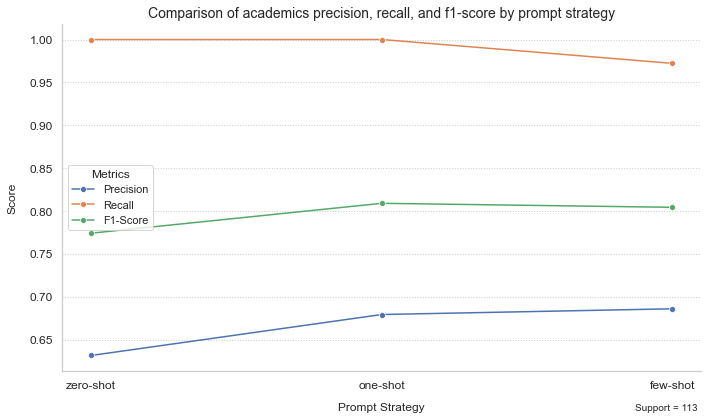

Result has been saved!
File 'value.png' saved successfully.


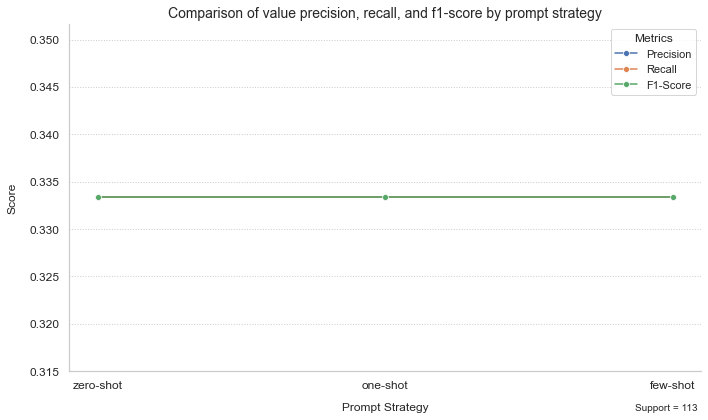

Result has been saved!
File 'diversity.png' saved successfully.


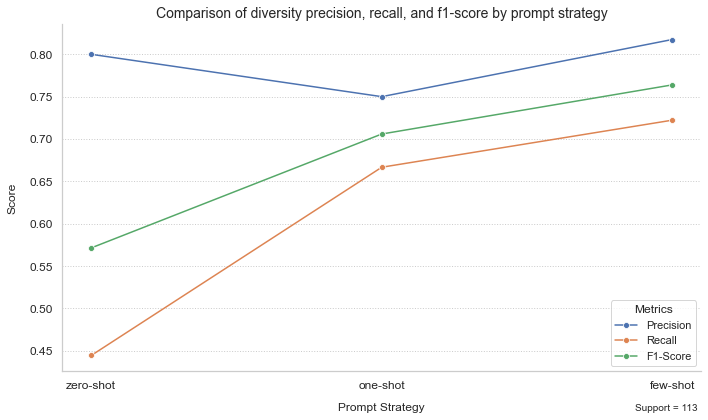

Result has been saved!
File 'campus.png' saved successfully.


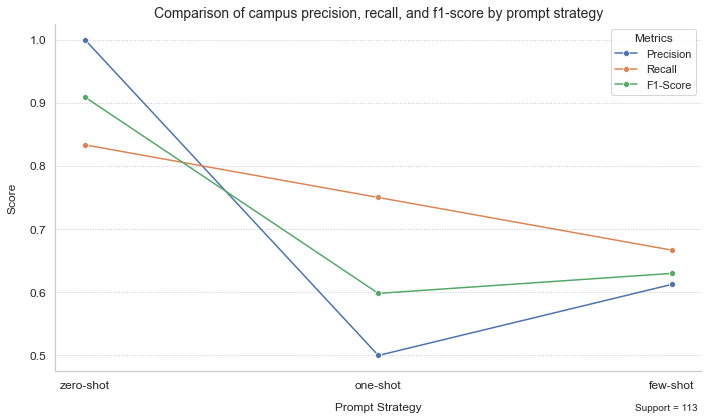

Result has been saved!
File 'location.png' saved successfully.


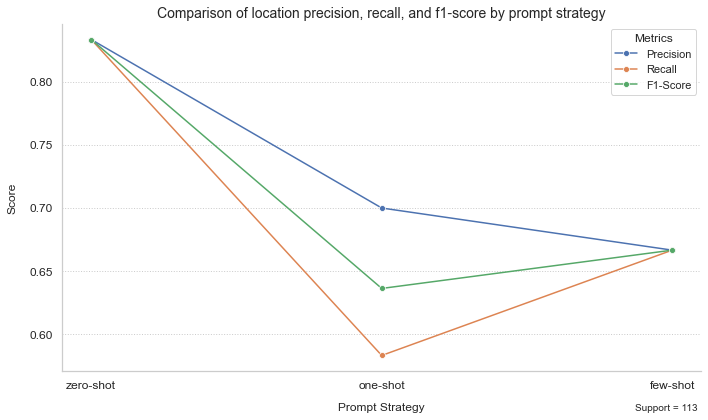

Result has been saved!
File 'dorms.png' saved successfully.


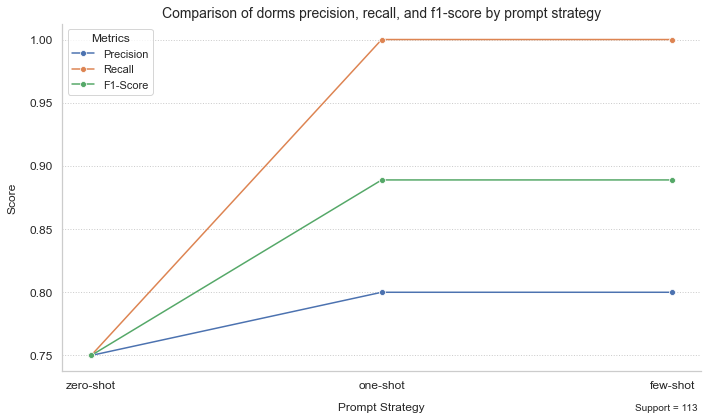

Result has been saved!
File 'campus_food.png' saved successfully.


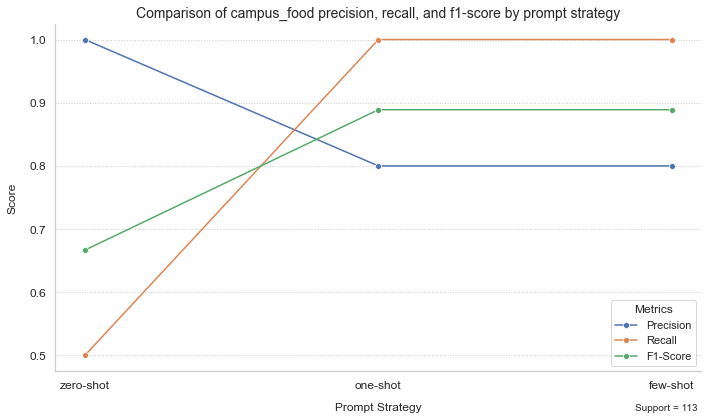

Result has been saved!
File 'student_life.png' saved successfully.


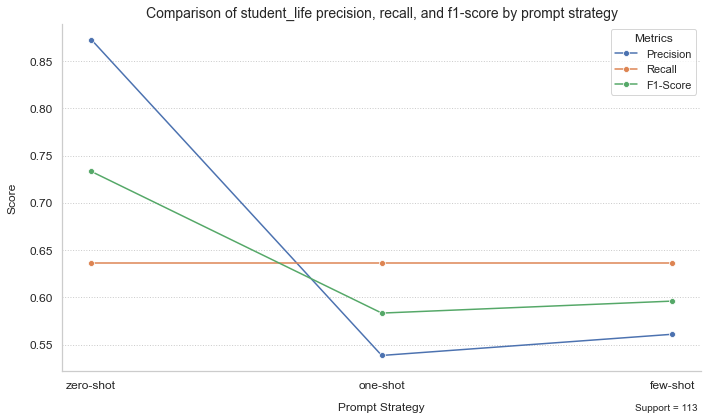

Result has been saved!
File 'athletics.png' saved successfully.


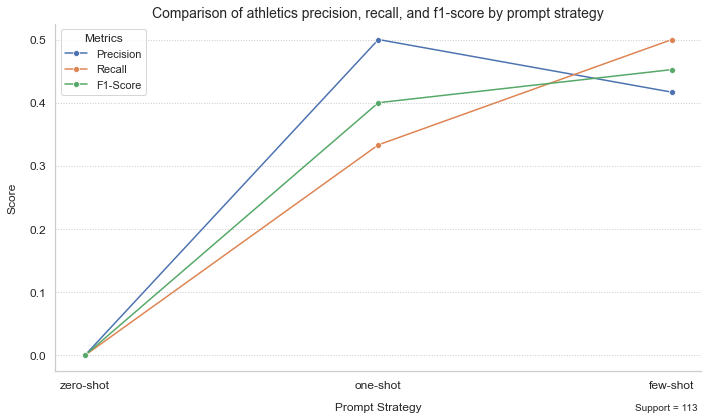

Result has been saved!
File 'party_scene.png' saved successfully.


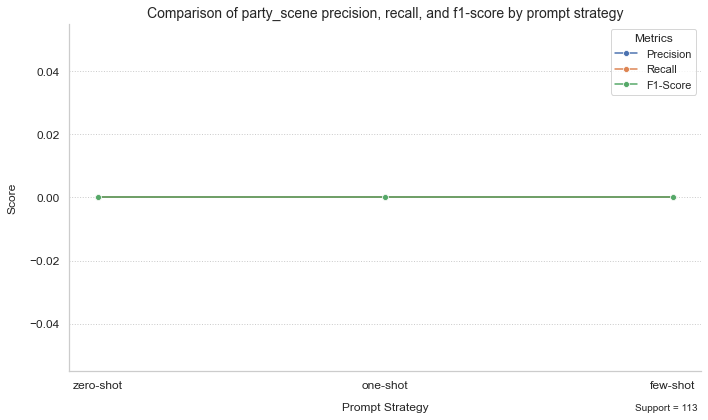

Result has been saved!
File 'professors.png' saved successfully.


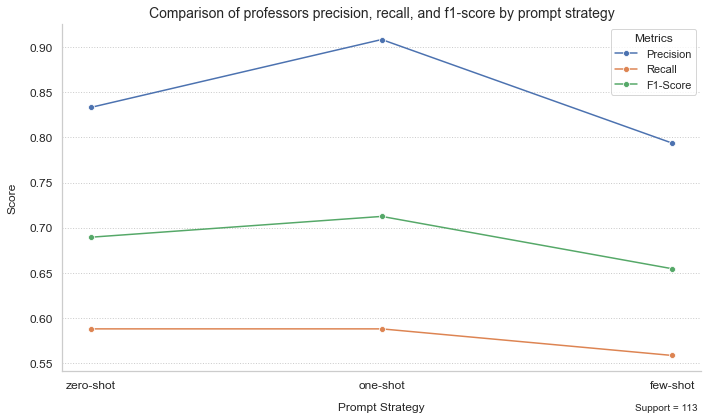

Result has been saved!
File 'safety.png' saved successfully.


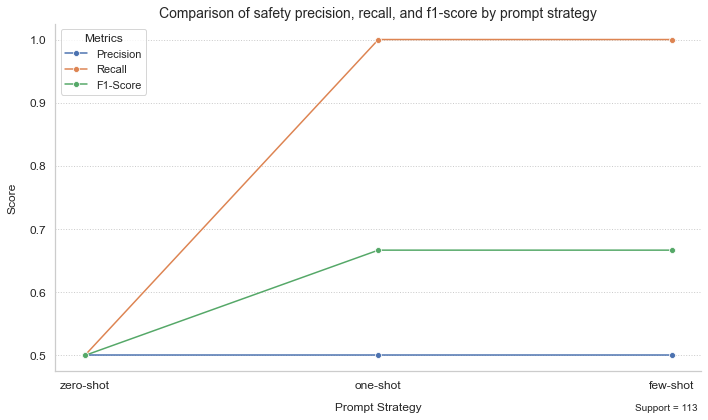

Result has been saved!
File 'irrelevant.png' saved successfully.


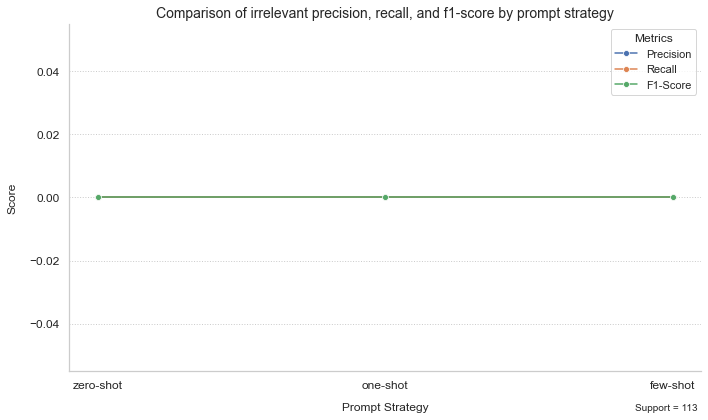

Result has been saved!
File 'administration.png' saved successfully.


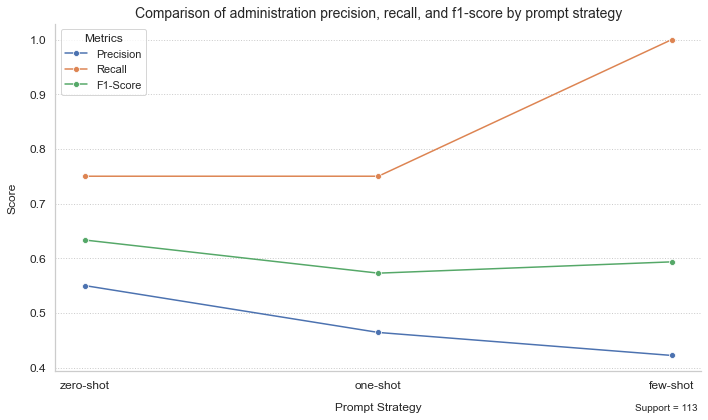

Result has been saved!
File 'unclear.png' saved successfully.


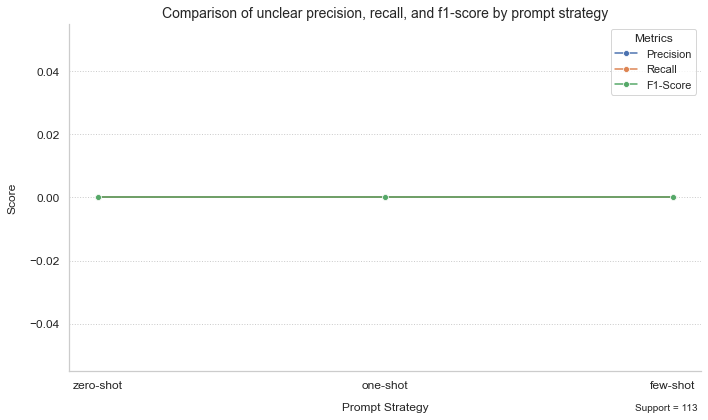

Result has been saved!
File 'affordability.png' saved successfully.


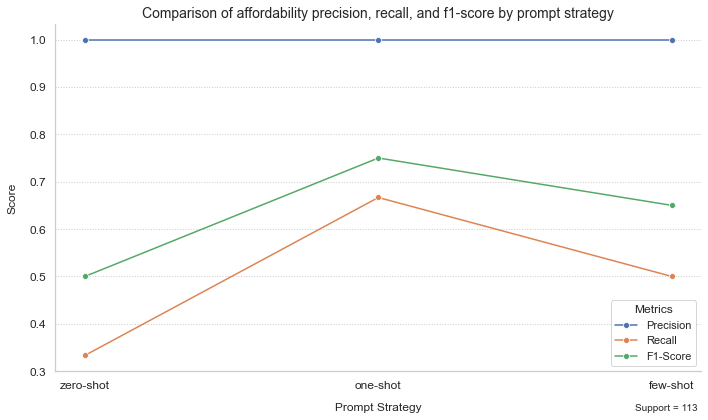

Result has been saved!
File 'campus_resource.png' saved successfully.


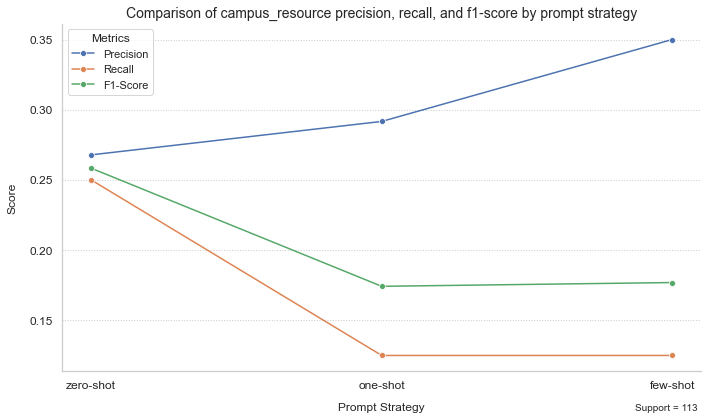

Result has been saved!
File 'career_prep.png' saved successfully.


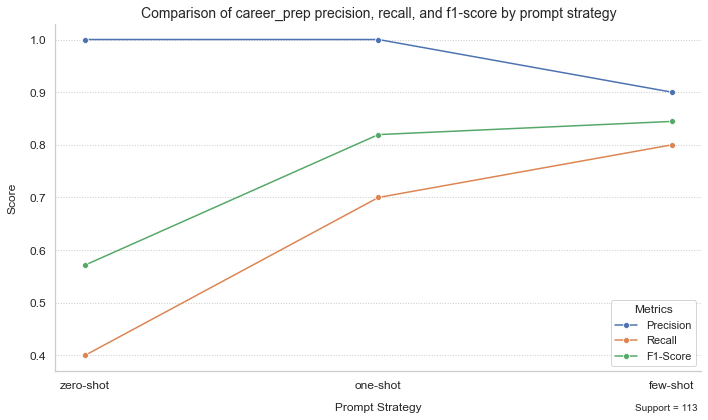

Result has been saved!
File 'alumni_network.png' saved successfully.


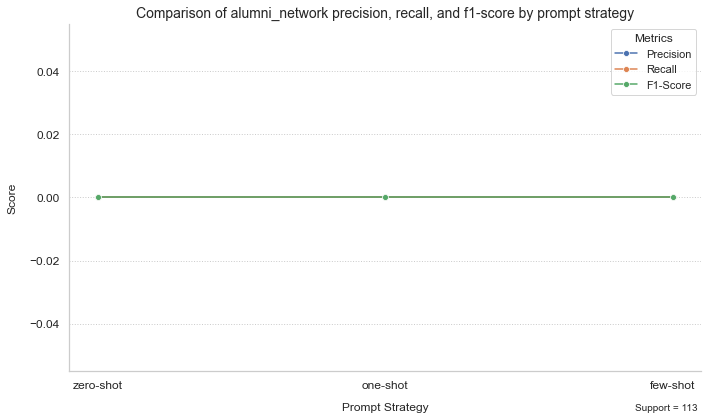

Result has been saved!
File 'community.png' saved successfully.


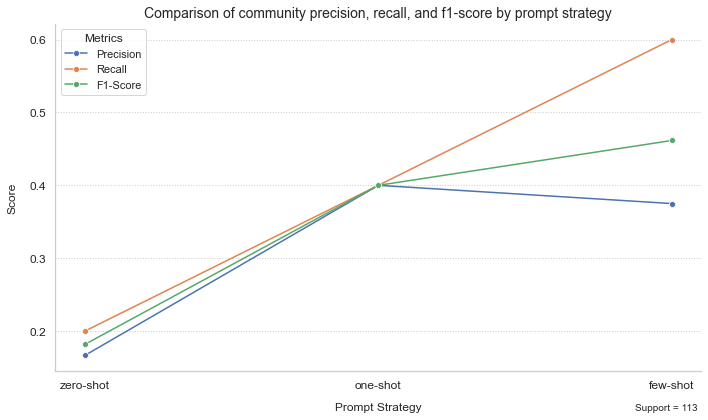

Result has been saved!
File 'mission.png' saved successfully.


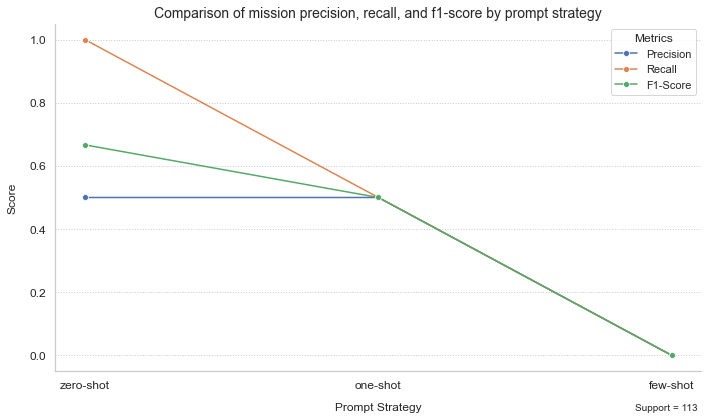

Result has been saved!
File 'micro avg.png' already exists. Skipping save.


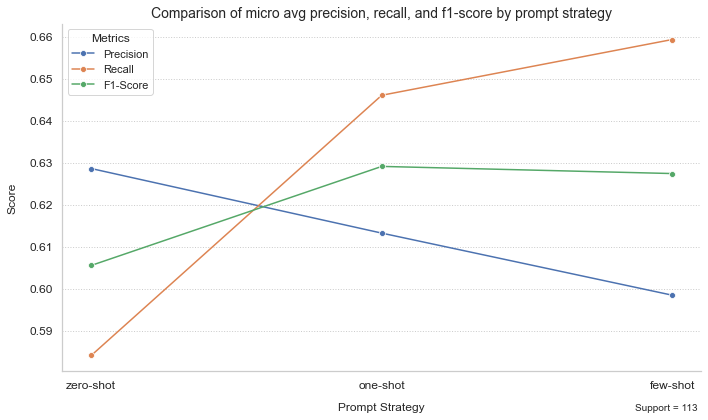

Result has been saved!
File 'macro avg.png' already exists. Skipping save.


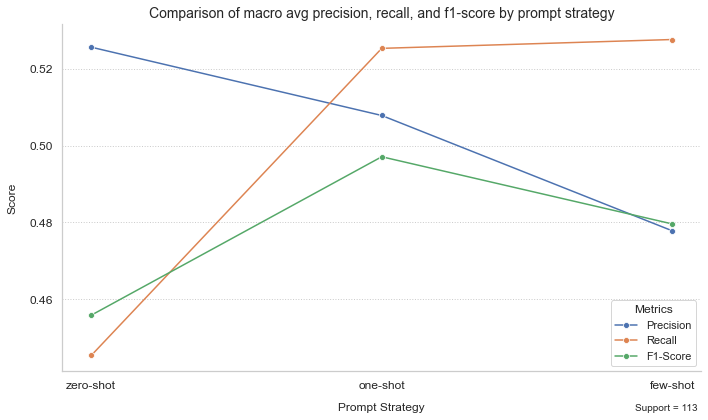

Result has been saved!
File 'weighted avg.png' already exists. Skipping save.


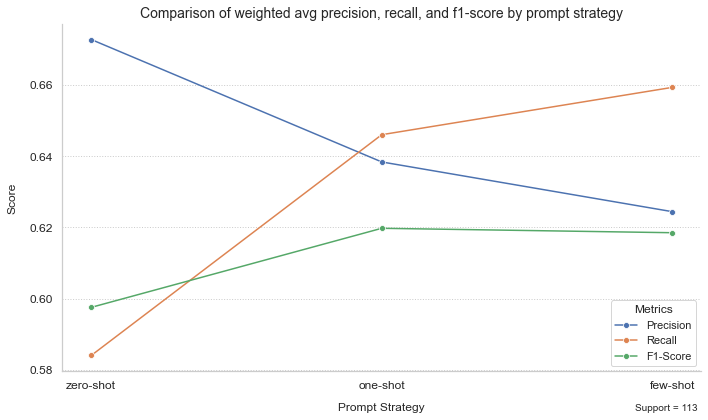

Result has been saved!
File 'samples avg.png' already exists. Skipping save.


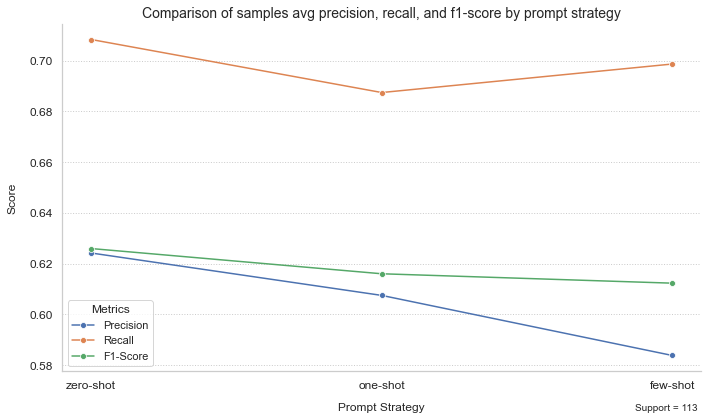

Result has been saved!


In [90]:
# agg_matrix = ['micro avg', 'macro avg', 'weighted avg', 'samples avg']
label = df_result.labels.unique()

for matrix in label:
    plot_aggregated_matrix(df_result, matrix)
    print(f'Result has been saved!')


<AxesSubplot:title={'center':'Distribution of labels'}, xlabel='labels'>

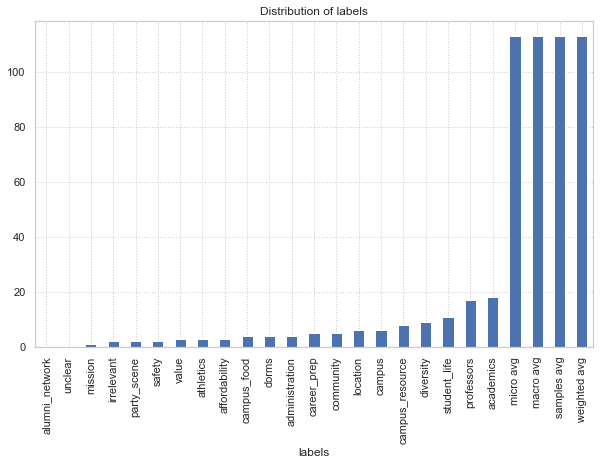

In [28]:
df_result.groupby('labels')['support'].mean().sort_values(ascending=True).plot(kind='bar', figsize=(10, 6), title='Distribution of labels')

File 'micro avg.png' already exists. Skipping save.


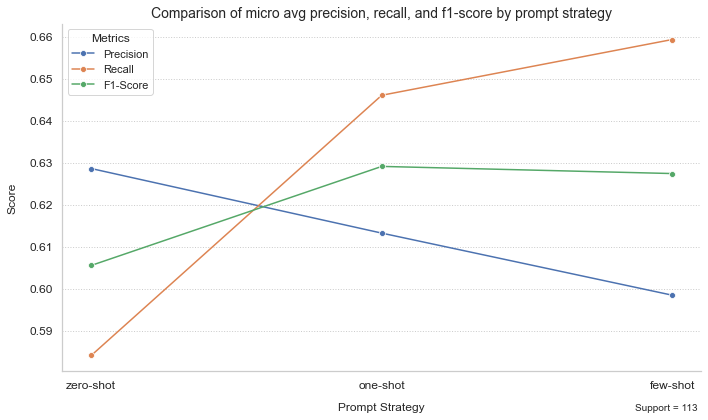

Result has been saved!
File 'macro avg.png' already exists. Skipping save.


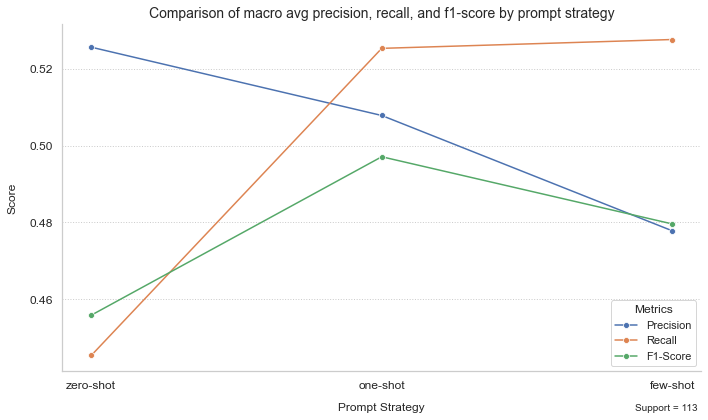

Result has been saved!
File 'weighted avg.png' already exists. Skipping save.


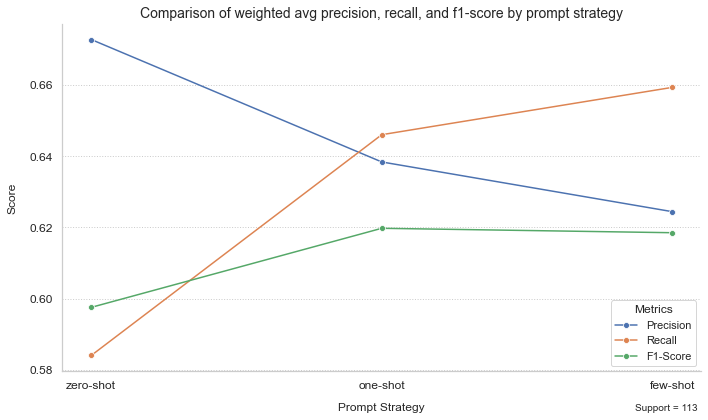

Result has been saved!
File 'samples avg.png' already exists. Skipping save.


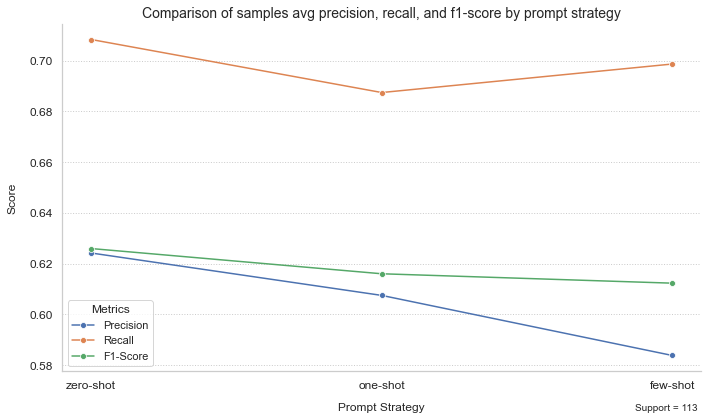

Result has been saved!


In [23]:
agg_matrix = ['micro avg', 'macro avg', 'weighted avg', 'samples avg']
# label = df_result.labels.unique()

for matrix in agg_matrix:
    plot_aggregated_matrix(df_result, matrix)
    print(f'Result has been saved!')

In [32]:
df_result.groupby('labels')['support'].mean().sort_values(ascending=True)

labels
alumni_network       0.0
unclear              0.0
mission              1.0
irrelevant           2.0
party_scene          2.0
safety               2.0
value                3.0
athletics            3.0
affordability        3.0
campus_food          4.0
dorms                4.0
administration       4.0
career_prep          5.0
community            5.0
location             6.0
campus               6.0
campus_resource      8.0
diversity            9.0
student_life        11.0
professors          17.0
academics           18.0
micro avg          113.0
macro avg          113.0
samples avg        113.0
weighted avg       113.0
Name: support, dtype: float64

In [14]:
agg_matrix = ['micro avg', 'macro avg', 'weighted avg', 'samples avg']
# label = df_result.labels.unique()

for matrix in agg_matrix:
    plot_aggregated_matrix(concatenated_df, matrix)
    print(f'Result has been saved!')

ValueError: Could not interpret value `prompt_strategy` for parameter `x`

<Figure size 720x432 with 0 Axes>